<a href="https://colab.research.google.com/github/cristinarainich/MLTSA22_KRainich/blob/main/train/07%7C04%7C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd 
import pylab as pl
import numpy as np
!pip install george

     |████████████████████████████████| 407 kB 8.3 MB/s 


In [11]:
import george 
from george import kernels

In [3]:
def f(x):
  np.random.seed(1)
  return np.random.rand(len(x))
t = [1.,3.,5.,6.,7.,8.]
t = np.atleast_2d(t).T
t

array([[1.],
       [3.],
       [5.],
       [6.],
       [7.],
       [8.]])

In [4]:
y = f(t)
ymean = y.mean()
y = y - ymean

In [5]:
yerr = np.abs(y)/2

<ErrorbarContainer object of 3 artists>

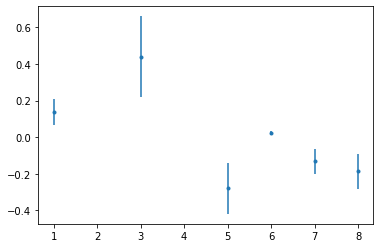

In [8]:
pl.errorbar(t, y, fmt = '.', yerr=yerr)

In [14]:
kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
gp = george.GP(kernel)

In [20]:
gp.compute(t,0)
t_pred = np.arange(0,10,0.1)

In [21]:
pred, pred_var = gp.predict(y,t_pred, return_var=True)

<ErrorbarContainer object of 3 artists>

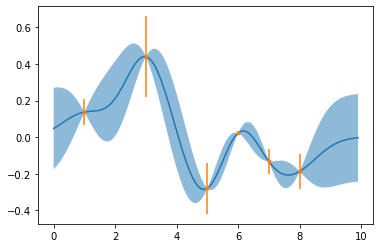

In [23]:
pl.fill_between(t_pred, pred - np.sqrt(pred_var), pred+np.sqrt(pred_var), alpha = 0.5)
pl.plot(t_pred,pred)
pl.errorbar(t,y,fmt='.',yerr=yerr)

In [25]:
gp.get_parameter_vector()

array([-2.8575194 , -0.69314718])